#  Library Management System - Comprehensive Analysis Task

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
books_dataset = pd.read_csv('books_dataset.csv')
members_dataset = pd.read_csv('members_dataset.csv')
transactions_dataset = pd.read_csv('transactions_dataset.csv')

##  Dataset Overview

In [ ]:
books_dataset.head()
# print(books_dataset.shape)    (500,5)

,Book_ID,Title,Author,Genre,Publication_Year
0,B001,The Quantum Enigma,Alice Johnson,Science,2018
1,B002,Shadows of Eternity,Mark Daniels,Fiction,2015
2,B003,Data Structures Unfolded,R. Gupta,Education,2021
3,B004,The Lost Civilization,Hannah Lee,History,2012
4,B005,AI and the Future,Carlos Mendez,Technology,2020


In [ ]:
members_dataset.head()
# print(members_dataset.shape)  (500,4)

,Member_ID,Name,Age,Membership_Type
0,M001,Neha Sharma,22,Student
1,M002,Ravi Patel,34,Regular
2,M003,Aisha Khan,28,Premium
3,M004,John Doe,45,Regular
4,M005,Sara Mehta,19,Student


In [ ]:
transactions_dataset.head()
transactions_dataset.describe()
# print(transactions_dataset.shape) (6687,4)

,Book_ID,Member_ID,Checkout_Date,Return_Date
count,6687,6687,6687,5741
unique,495,500,676,672
top,B012,M001,2023-05-16,2024-11-06
freq,48,17,19,128


### Observations


1.  Of the 6,687 books borrowed, 946 remain unreturned.
2.  Five books have never been borrowed
3.  Book having Book_ID B012 is borrowed most number of time i.e 48   times
4.  Member having Member_ID has borrowed books most number of times i.e 17 times


##  Key Analysis Areas

### **1. Most Popular Books and Authors**

In [ ]:
# Which books have been borrowed the most times?
# book_id_freq = transactions_dataset['Book_ID'].value_counts()
# print(book_id_freq[book_id_freq > 39])

most_borrowed_books = transactions_dataset['Book_ID'].value_counts().nlargest(5)
print(most_borrowed_books)

Book_ID
B012    48
B192    45
B272    41
B144    40
B195    39
Name: count, dtype: int64


In [ ]:
# Who are the top 10 most popular authors?
merged_data = pd.merge(transactions_dataset,books_dataset,on = 'Book_ID',how='left')
print(merged_data['Author'].value_counts().nlargest(10))                              # top 10 authors by the number of times their books have been borrowed

Author
Mark Daniels          300
Dr. Amara Okafor      299
Fatima Al-Zahra       272
Nadia Petrov          261
Rachel Kim            250
Jennifer Lopez        249
Ahmed Hassan          249
Sophie Martin         241
Hannah Lee            240
Isabella Rodriguez    239
Name: count, dtype: int64


In [ ]:
# Are newer books more popular than older ones?
new_count = merged_data[merged_data['Publication_Year'] > 2013].shape[0]          # number of borrowed books published after 2013
old_count = merged_data[merged_data['Publication_Year'] <= 2013].shape[0]        # number of borrowed books pulished in or before 2013

print('Newer books are more popular then older ones') if new_count > old_count else print('Old books are more popular than new ones')

Newer books are more popular then older ones


In [ ]:
# Do certain genres get borrowed more frequently?
print('Genres that are borroweded more frequently\n',merged_data['Genre'].value_counts().nlargest(5))

Genres that are borroweded more frequently
 Genre
Biography     697
Health        676
Technology    649
History       594
Education     537
Name: count, dtype: int64


### **2. Member Usage Patterns**

#### **Key Patterns to Discover**

In [ ]:
# Which membership types borrow the most books?
members_transaction_merge = pd.merge(transactions_dataset,members_dataset,on='Member_ID',how = 'inner')
members_transaction_merge['Membership_Type'].value_counts().nlargest(1)

,count
Membership_Type,
Regular,2412


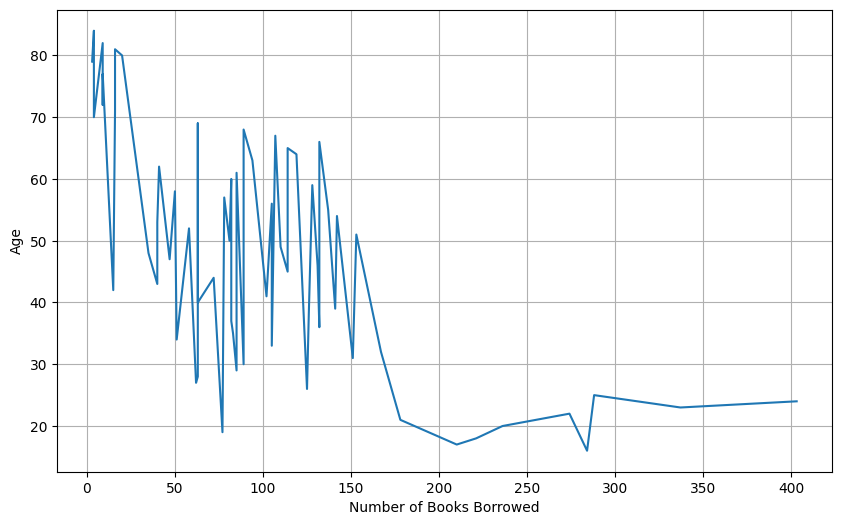

In [ ]:
# How does borrowing frequency vary by age group?
age_counts_series = members_transaction_merge['Age'].value_counts()
ages = age_counts_series.index
counts = age_counts_series.values

plt.figure(figsize=(10, 6))
plt.plot( counts,ages)
plt.xlabel('Number of Books Borrowed')
plt.ylabel('Age')
plt.grid(True)
plt.show()

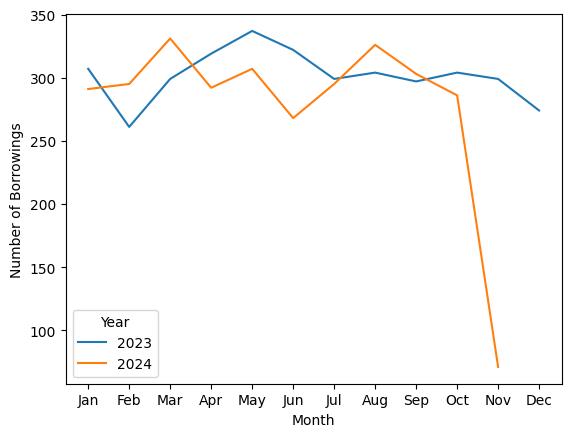

In [ ]:
# Are there seasonal borrowing patterns?
transactions_dataset['Checkout_Date'] = pd.to_datetime(transactions_dataset['Checkout_Date'])     # convert checkout date to datetime obj
transactions_dataset['Year'] = transactions_dataset['Checkout_Date'].dt.year                      # extract year
transactions_dataset['Month'] = transactions_dataset['Checkout_Date'].dt.month                    # ectract month

monthly_borrowings = transactions_dataset.groupby(['Year','Month']).size().unstack(level = 'Year')    # group by year and month to look at brrowing patterns of each year
monthly_borrowings.plot()
plt.xlabel('Month')
plt.ylabel('Number of Borrowings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# Who are the most active vs inactive members?
active_count = transactions_dataset.groupby(['Member_ID']).size().sort_values(ascending=False).head(1).iloc[0]
inactive_count = transactions_dataset.groupby(['Member_ID']).size().sort_values(ascending=False).tail(1).iloc[0]
active_members = (transactions_dataset.groupby(['Member_ID']).size().loc[lambda x : x == active_count])
inactive_members = (transactions_dataset.groupby(['Member_ID']).size().loc[lambda x : x == inactive_count])
print(active_members)
print(inactive_members)

Member_ID
M001    17
M002    17
M003    17
M005    17
M006    17
M009    17
M010    17
dtype: int64
Member_ID
M425    3
M498    3
dtype: int64


#### **Age Groups for Analysis:**

In [ ]:
# assigning age_group to each
bins = [16, 20, 30, 50, 65,120]
labels = ["16-19","20-29","30-49","50-64","60+"]
members_transaction_merge['Age_Group'] = pd.cut(
    members_transaction_merge['Age'],
    bins=bins,
    labels=labels,
    right=True
)


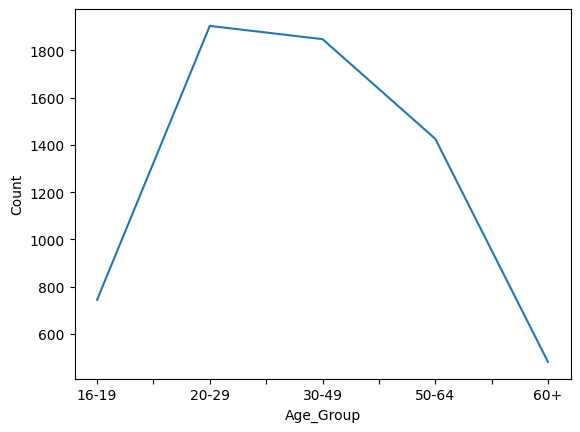

In [ ]:
# Count of members across each age group
members_transaction_merge.groupby(['Age_Group'],observed=True).size().plot()
plt.ylabel('Count')
plt.show()

In [ ]:
no_return = members_transaction_merge[members_transaction_merge['Return_Date'].isna()].groupby('Age_Group',observed = True).size()
print("Most No Returns:", no_return.idxmax(), "-", no_return.max())

Most No Returns: 20-29 - 301


In [ ]:
returned = members_transaction_merge[members_transaction_merge['Return_Date'].notna()].groupby('Age_Group',observed = True).size()
print("Most Returns:",returned.idxmax(),"-",returned.max())

Most Returns: 30-49 - 1640


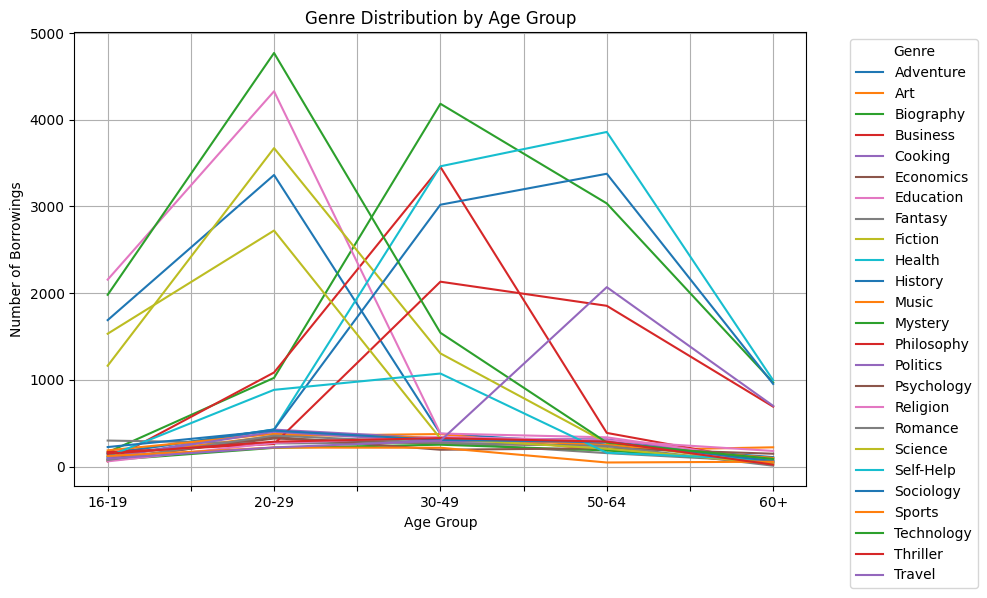

In [ ]:
genre_age_group = pd.merge(members_transaction_merge[['Member_ID','Age_Group']],merged_data[['Member_ID','Genre']],how='left',on= 'Member_ID')

# Create a figure and an axes with the desired figsize
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data using the created axes
genre_age_group.groupby(['Age_Group','Genre'],observed=True).size().unstack(fill_value=0).plot(ax=ax)

plt.title('Genre Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Borrowings')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### **3. Overdue Analysis**

In [ ]:
# **Current overdue books**: 5 books are currently overdue (>30 days)
from datetime import timedelta
print(transactions_dataset[
    (transactions_dataset['Return_Date'].isna()) |
    (transactions_dataset['Return_Date'] > transactions_dataset['Checkout_Date'] + timedelta(days=30))
].shape[0],'books are currently overdue')

1290 books are currently overdue


In [ ]:
# **Unreturned books**: 5 books haven't been returned yet
print(transactions_dataset[
    (transactions_dataset['Return_Date'].isna())
].shape[0],'books haven\'t been returned yet')

946 books haven't been returned yet


In [ ]:
# **Return patterns**: Average loan period analysis
returned = transactions_dataset.dropna(subset=['Return_Date']).copy()

# Convert both columns to datetime first
returned['Return_Date'] = pd.to_datetime(returned['Return_Date'])
returned['Checkout_Date'] = pd.to_datetime(returned['Checkout_Date'])

# Now calculate the duration
returned['Loan_Duration'] = (returned['Return_Date'] - returned['Checkout_Date']).dt.days

returned_members_merge = pd.merge(returned,members_dataset,on = 'Member_ID',how = 'left')
returned_members_merge.groupby('Membership_Type')['Loan_Duration'].mean()

,Loan_Duration
Membership_Type,
Faculty,13.701439
Premium,13.588672
Regular,13.250605
Senior,12.623377
Student,12.992041


In [ ]:
# **Member reliability**: Which membership types return books on time?
# Calculate if books were returned on time
returned_members_merge['Days_Overdue'] = returned_members_merge['Loan_Duration'] - 30
returned_members_merge['Returned_On_Time'] = returned_members_merge['Days_Overdue'] <= 0

# Group by membership type
reliability_by_membership = returned_members_merge.groupby('Membership_Type').agg({
    'Returned_On_Time': ['sum', 'count', 'mean'],
}).round(2)

# Flatten column names
reliability_by_membership.columns = ['On_Time_Returns', 'Total_Returns', 'On_Time_Rate']

print(reliability_by_membership)

                 On_Time_Returns  Total_Returns  On_Time_Rate
Membership_Type                                              
Faculty                      260            278          0.94
Premium                     1381           1483          0.93
Regular                     1956           2067          0.95
Senior                       148            154          0.96
Student                     1652           1759          0.94


### **4. Genre Preferences by Age Group**

In [ ]:
# add genre
genre_by_age = pd.merge(members_transaction_merge,books_dataset[['Book_ID','Genre']],how='inner',on='Book_ID')
genre_by_age = genre_by_age.groupby(['Age_Group','Genre'],observed = True).size().reset_index(name='Count')

genre_pivot = genre_by_age.pivot(index='Age_Group', columns='Genre', values='Count').fillna(0)
print(genre_pivot)

Genre      Adventure  Art  Biography  Business  Cooking  Economics  Education  \
Age_Group                                                                       
16-19            113    8         11         4        7          6        144   
20-29            230   24         74        80       30         22        296   
30-49             28   27        303       256       23         18         28   
50-64             20   13        225        28       22         18         23   
60+                9   22         78         3        7          9          5   

Genre      Fantasy  Fiction  Health  ...  Psychology  Religion  Romance  \
Age_Group                            ...                                  
16-19           20       79      10  ...           5         4        5   
20-29           19      255      30  ...          24        19       24   
30-49           20       97     252  ...          14        24       21   
50-64           12       21     299  ...          17     

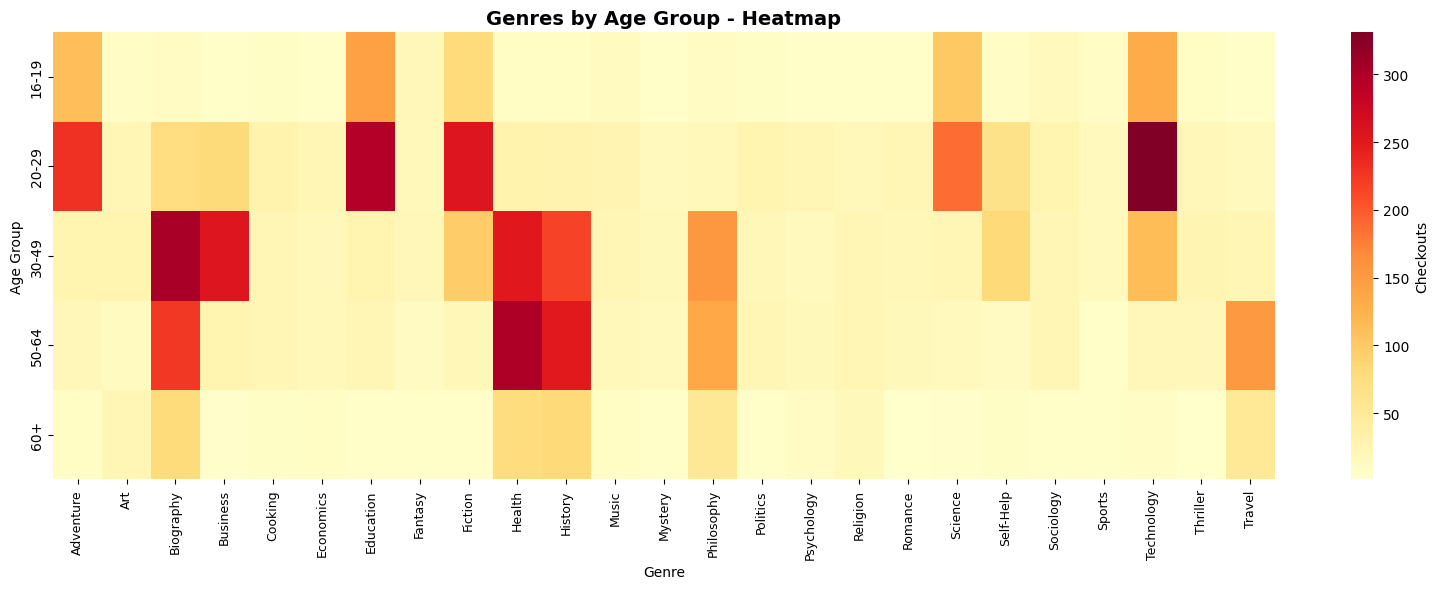

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(
    genre_pivot,
    annot=False,
    cmap='YlOrRd',
    cbar_kws={'label': 'Checkouts'}
)

plt.title('Genres by Age Group - Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.xticks(rotation=90, fontsize=9)
plt.tight_layout()
plt.show()

### **5. Library Utilization Optimization**

In [ ]:
# Which books should be purchased in multiple copies?

# Books with high demand (most checkouts)
book_demand =merged_data.groupby('Title').agg({
    'Member_ID': 'count',
    'Genre': 'first',
    'Author': 'first'
}).rename(columns={'Member_ID': 'Total_Checkouts'})

book_demand = book_demand.sort_values('Total_Checkouts', ascending=False)

top_books = book_demand.head(20)
print("Books Recommended for Multiple Copies (Top 20):")
print(top_books)


Books Recommended for Multiple Copies (Top 20):
                      Total_Checkouts       Genre               Author
Title                                                                 
Chronicles of Future               64     History         Nadia Petrov
The Courage Analysis               62      Health      Fatima Al-Zahra
The War Revolution                 58  Technology           Rachel Kim
The Fear Manual                    57      Health     Dr. Amara Okafor
Future of Reality                  56  Technology        Anna Kowalski
The Desert Story                   48   Biography         James Miller
The Freedom Analysis               45      Health             R. Gupta
Beauty: A Biography                45   Biography     Dr. Amara Okafor
The Power Handbook                 42      Health        Sophie Martin
The Desert Manual                  42      Travel     Dr. Sarah Wilson
The Ice Study                      42      Health        Alice Johnson
Desert: A Biography          

In [ ]:
# What genres are underrepresented in borrowing?

# get unique books and their counts
genre_checkouts = merged_data.groupby('Genre').agg({
    'Book_ID': 'count',
    'Title': 'nunique'
}).rename(columns={
    'Book_ID': 'Total_Checkouts',
    'Title': 'Unique_Books'
})

genre_checkouts['Avg_Checkouts_Per_Book'] = (
    genre_checkouts['Total_Checkouts'] / genre_checkouts['Unique_Books']
).round(2)

genre_checkouts = genre_checkouts.sort_values('Total_Checkouts', ascending=True)

print("Genre Performance Analysis:")
print(genre_checkouts)

Genre Performance Analysis:
            Total_Checkouts  Unique_Books  Avg_Checkouts_Per_Book
Genre                                                            
Sports                   50            15                    3.33
Mystery                  59            15                    3.93
Romance                  71            16                    4.44
Psychology               72            18                    4.00
Economics                74            19                    3.89
Fantasy                  79            20                    3.95
Thriller                 80            19                    4.21
Politics                 88            21                    4.19
Religion                 90            20                    4.50
Music                    95            21                    4.52
Cooking                  95            23                    4.13
Art                      97            20                    4.85
Sociology                98            27       

In [ ]:
# When are peak borrowing periods?
# Convert to datetime
transactions_dataset['Checkout_Date'] = pd.to_datetime(transactions_dataset['Checkout_Date'])

# Extract time features
transactions_dataset['Month'] = transactions_dataset['Checkout_Date'].dt.month
transactions_dataset['Month_Name'] = transactions_dataset['Checkout_Date'].dt.month_name()
transactions_dataset['Day_of_Week'] = transactions_dataset['Checkout_Date'].dt.day_name()
transactions_dataset['Week'] = transactions_dataset['Checkout_Date'].dt.isocalendar().week

# Monthly trends
monthly_checkouts = transactions_dataset.groupby('Month_Name').size()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_checkouts = monthly_checkouts.reindex([m for m in month_order if m in monthly_checkouts.index])

# Day of week trends
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_checkouts = transactions_dataset.groupby('Day_of_Week').size()
daily_checkouts = daily_checkouts.reindex([d for d in day_order if d in daily_checkouts.index])

print(f"Busiest month: {monthly_checkouts.idxmax()}")
print(f"Busiest day: {daily_checkouts.idxmax()}")

Busiest month: May
Busiest day: Friday


In [ ]:
# How can we improve member engagement?
member_activity = merged_data.groupby('Member_ID').agg({
    'Book_ID': 'count',
    'Checkout_Date': ['min', 'max'],
    'Genre': 'nunique',
    'Title': 'nunique'
}).round(2)

member_activity.columns = ['Total_Checkouts', 'First_Checkout', 'Last_Checkout', 'Genres_Explored', 'Unique_Books']

member_activity['First_Checkout'] = pd.to_datetime(member_activity['First_Checkout'])
member_activity['Last_Checkout'] = pd.to_datetime(member_activity['Last_Checkout'])

member_activity['Days_Active'] = (
    member_activity['Last_Checkout'] - member_activity['First_Checkout']
).dt.days

member_activity['Avg_Checkouts_Per_Month'] = (
    member_activity['Total_Checkouts'] / (member_activity['Days_Active'] / 30)
).round(2)

In [ ]:
# Categorize members
def engagement_level(checkouts):
    if checkouts >= 20:
        return 'Heavy'
    elif checkouts >= 10:
        return 'Regular'
    elif checkouts >= 5:
        return 'Light'
    else:
        return 'Inactive'


In [ ]:
member_activity['Engagement_Level'] = member_activity['Total_Checkouts'].apply(engagement_level)
inactive_members = member_activity[member_activity['Engagement_Level'].isin(['Inactive', 'Light'])]
casual_readers = member_activity[
    (member_activity['Total_Checkouts'] <= 5) &
    (member_activity['Genres_Explored'] <= 2)
]

print(f"{len(inactive_members)} members need re-engagement campaigns")
print(f"{len(casual_readers)} members could explore more genres")

57 members need re-engagement campaigns
2 members could explore more genres


## Advanced Analysis Challenges


### Challenge 1: Member Segmentation

In [ ]:
member_activity

,Total_Checkouts,First_Checkout,Last_Checkout,Genres_Explored,Unique_Books,Days_Active,Avg_Checkouts_Per_Month,Engagement_Level
Member_ID,,,,,,,,
M001,17,2023-03-06,2024-10-03,9,15,577,0.88,Regular
M002,17,2023-01-10,2024-09-21,7,16,620,0.82,Regular
M003,17,2023-04-08,2024-10-31,8,17,572,0.89,Regular
M004,12,2023-01-03,2024-10-10,9,12,646,0.56,Regular
M005,17,2023-01-01,2024-10-26,8,17,664,0.77,Regular
...,...,...,...,...,...,...,...,...
M496,11,2023-01-09,2024-09-28,7,11,628,0.53,Regular
M497,15,2023-01-08,2024-10-28,8,15,659,0.68,Regular
M498,3,2023-10-19,2024-06-11,3,3,236,0.38,Inactive


### Challenge 2: Seasonal Trends

In [ ]:
# Borrowing Patterns by Month of the Year

print(f"Peak Month: {monthly_checkouts.idxmax()} ({monthly_checkouts.max()} checkouts)")
print(f"Slowest Month: {monthly_checkouts.idxmin()} ({monthly_checkouts.min()} checkouts)")
print(f"Average per month: {monthly_checkouts.mean():.0f} checkouts")

Peak Month: May (644 checkouts)
Slowest Month: December (274 checkouts)
Average per month: 557 checkouts


In [ ]:
# Define seasons based on academic calendar
def assign_season(month):
    if month in [7, 8, 9]:  # June, July, August, September
        return 'First Semester (Part 1)'
    elif month in [10]:        # October
        return 'Diwali Break'
    elif month in [11, 12]:     # November, December
        return 'First Semester (Part 2)'
    elif month in [1,2,3,4,5,6]:      # Jan - June
        return 'Second Semester'

In [ ]:
# Borrowing Patterns by Season

transactions_dataset['Season'] = transactions_dataset['Month'].apply(assign_season)
season_checkouts = transactions_dataset.groupby('Season').size()
print(f"Most Active Period: {season_checkouts.idxmax()} ({season_checkouts.max()} checkout)")
print(f"Least Active Period: {season_checkouts.idxmin()} ({season_checkouts.min()} checkouts)")

Most Active Period: Second Semester (3629 checkout)
Least Active Period: Diwali Break (590 checkouts)


In [ ]:
# Day of the Week Trends
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_checkouts = transactions_dataset.groupby('Day_of_Week').size()
daily_checkouts = daily_checkouts.reindex([d for d in day_order if d in daily_checkouts.index])

weekday_total = daily_checkouts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
weekend_total = daily_checkouts[['Saturday', 'Sunday']].sum()

print(f"Busiest Day: {daily_checkouts.idxmax()} ({daily_checkouts.max()} checkouts)")
print(f"Slowest Day: {daily_checkouts.idxmin()} ({daily_checkouts.min()} checkouts)")
print(f"Weekday Average: {weekday_total/5:.0f} checkouts/day")
print(f"Weekend Average: {weekend_total/2:.0f} checkouts/day")
print(f"Weekday vs Weekend: {weekday_total} vs {weekend_total} ({weekday_total/weekend_total:.2f}:1 ratio)")

Busiest Day: Friday (997 checkouts)
Slowest Day: Sunday (908 checkouts)
Weekday Average: 963 checkouts/day
Weekend Average: 936 checkouts/day
Weekday vs Weekend: 4816 vs 1871 (2.57:1 ratio)


### Challenge 3: Predictive Analysis

In [ ]:
member_preferences = merged_data.groupby('Member_ID').agg({
    'Genre': lambda x: x.value_counts().index[0],       # Favorite genre
    'Author': lambda x: x.value_counts().index[0],      # Favorite author
    'Title': lambda x: list(x.unique())            # Books already borrowed
}).rename(columns={'Genre': 'Favorite_Genre', 'Author': 'Favorite_Author', 'Title': 'Books_Borrowed'})

In [ ]:
# Function to recommend books for a member
def recommend_books_for_member(member_id, top_n=5):
    if member_id not in member_preferences.index:
        return "Member not found"

    member_profile = member_preferences.loc[member_id]
    favorite_genre = member_profile['Favorite_Genre']
    favorite_author = member_profile['Favorite_Author']
    already_borrowed = set(member_profile['Books_Borrowed'])

    # Find popular books in favorite genre that member hasn't borrowed
    genre_books = merged_data[
        (merged_data['Genre'] == favorite_genre) &
        (~merged_data['Title'].isin(already_borrowed))
    ]

    # Rank by popularity
    recommendations = genre_books.groupby('Title').agg({
        'Book_ID': 'count',
        'Author': 'first'
    }).rename(columns={'Book_ID': 'Popularity'}).sort_values('Popularity', ascending=False)

    recommendations = recommendations.sort_values('Popularity', ascending=False).head(top_n)



    return recommendations[['Author', 'Popularity']]

In [ ]:
print("Book Predictions for Member M001:")
print(recommend_books_for_member('M001', top_n=5))

Book Predictions for Member M001:
                                Author  Popularity
Title                                             
Mastering Freedom         Robert Smith          32
Truth Fundamentals        James Miller          28
Advanced Courage          Viktor Novak          28
Desert for Beginners        Rachel Kim          26
Data Structures Unfolded      R. Gupta          25


In [ ]:
# Identify members at risk of becoming inactive
current_date = transactions_dataset['Checkout_Date'].max()

member_activity_risk = transactions_dataset.groupby('Member_ID').agg({
    'Checkout_Date': ['min', 'max', 'count'],
    'Book_ID': 'count'
}).round(2)

member_activity_risk.columns = ['First_Checkout', 'Last_Checkout', 'Date_Count', 'Total_Checkouts']


In [ ]:
member_activity_risk['Days_Since_Last_Visit'] = (
    current_date - member_activity_risk['Last_Checkout']
).dt.days

member_activity_risk['Member_Lifetime_Days'] = (
    member_activity_risk['Last_Checkout'] - member_activity_risk['First_Checkout']
).dt.days

member_activity_risk['Avg_Days_Between_Visits'] = (
    member_activity_risk['Member_Lifetime_Days'] / member_activity_risk['Total_Checkouts']
).fillna(0)

member_activity_risk['Expected_Return_Date'] = (
    member_activity_risk['Last_Checkout'] +
    pd.to_timedelta(member_activity_risk['Avg_Days_Between_Visits'], unit='D')
)

member_activity_risk['Days_Overdue_Expected'] = (
    current_date - member_activity_risk['Expected_Return_Date']
).dt.days


In [ ]:
# Calculate risk score (0-100)
def calculate_risk_score(row):
    score = 0

    # Factor 1: Days since last visit (0-40 points)
    if row['Days_Since_Last_Visit'] > 180:
        score += 40
    elif row['Days_Since_Last_Visit'] > 90:
        score += 30
    elif row['Days_Since_Last_Visit'] > 60:
        score += 20
    elif row['Days_Since_Last_Visit'] > 30:
        score += 10

    # Factor 2: Overdue expected return (0-30 points)
    if row['Days_Overdue_Expected'] > 60:
        score += 30
    elif row['Days_Overdue_Expected'] > 30:
        score += 20
    elif row['Days_Overdue_Expected'] > 14:
        score += 10

    # Factor 3: Low engagement (0-30 points)
    if row['Total_Checkouts'] <= 2:
        score += 30
    elif row['Total_Checkouts'] <= 5:
        score += 15

    return min(score, 100)

member_activity_risk['Risk_Score'] = member_activity_risk.apply(calculate_risk_score, axis=1)

In [ ]:
# Categorize risk level
def risk_category(score):
    if score >= 70:
        return 'High Risk'
    elif score >= 40:
        return 'Medium Risk'
    elif score >= 20:
        return 'Low Risk'
    else:
        return 'Active'

member_activity_risk['Risk_Category'] = member_activity_risk['Risk_Score'].apply(risk_category)

# Sort by risk score
at_risk_members = member_activity_risk.sort_values('Risk_Score', ascending=False)


In [ ]:
print(f"\nTotal Members: {len(member_activity_risk)}")
print(f"High Risk: {(member_activity_risk['Risk_Category'] == 'High Risk').sum()}")
print(f"Medium Risk: {(member_activity_risk['Risk_Category'] == 'Medium Risk').sum()}")
print(f"Low Risk: {(member_activity_risk['Risk_Category'] == 'Low Risk').sum()}")
print(f"Active: {(member_activity_risk['Risk_Category'] == 'Active').sum()}")

print("\nTop 10 Members at Risk:")
print(member_activity_risk[['Days_Since_Last_Visit', 'Total_Checkouts', 'Risk_Score', 'Risk_Category']].head(10))


Total Members: 500
High Risk: 16
Medium Risk: 107
Low Risk: 35
Active: 342

Top 10 Members at Risk:
           Days_Since_Last_Visit  Total_Checkouts  Risk_Score Risk_Category
Member_ID                                                                  
M001                          34               17          10        Active
M002                          46               17          10        Active
M003                           6               17           0        Active
M004                          27               12           0        Active
M005                          11               17           0        Active
M006                          19               17           0        Active
M007                           1               14           0        Active
M008                           2               12           0        Active
M009                           4               17           0        Active
M010                          17               17           0  

### Challenge 4: Collection Management